In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [145]:
data = pd.read_csv('Fully_Cleaned_Enrollments_Dataset.csv')


In [146]:
data.head(10)

,Timestamp,Parent name,Child Name,Age,Communication Preference,Teacher Name,Source,Source details,Class ID,Type,...,Another class,Score - Concept,Score - Interesting,Score - Another class,Yes,Maybe,No,Final score,ID for sequential classes,Class Part Number
0,NaN,Raphaela Heussen,Elsa,9.0,Email,Clark Vandeventer,Friends and Family,Homeschool,7,Onetime,...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.652637,1.699449
1,NaN,Raphaela Heussen,Elsa,9.0,Email,Nicole Pauling,Friends and Family,Homeschool,14,Onetime,...,Yes,3.0,3.0,3.0,3.0,0.0,0.0,9.0,210.652637,1.699449
2,NaN,Swetha Chandra,Vivaan,7.0,Email,Bill Thompson,Friends and Family,Homeschool,18,Onetime,...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.652637,1.699449
3,NaN,Swetha Chandra,Vivaan,7.0,Email,Clark Vandeventer,Friends and Family,Homeschool,19,Onetime,...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.652637,1.699449
4,NaN,Raphaela Heussen,Ana,13.0,Email,Clark Vandeventer,Friends and Family,Homeschool,11,Onetime,...,Maybe,3.0,3.0,2.0,2.0,1.0,0.0,8.0,210.652637,1.699449
5,NaN,Raphaela Heussen,Ana,13.0,Email,Keallah Smith,Friends and Family,Homeschool,16,Onetime,...,Yes,3.0,3.0,3.0,3.0,0.0,0.0,9.0,210.652637,1.699449
6,NaN,Rashma Madhavaram,Vihaan Durga Avirneni,8.0,Email,Aaron Potsick,Friends and Family,Homeschool,4,Onetime,...,Maybe,3.0,3.0,2.0,2.0,1.0,0.0,8.0,210.652637,1.699449
7,NaN,Rashma Madhavaram,Vihaan Durga Avirneni,8.0,Email,Misses Dee,Friends and Family,Homeschool,5,Onetime,...,Yes,3.0,3.0,3.0,3.0,0.0,0.0,9.0,210.652637,1.699449
8,NaN,Rashma Madhavaram,Vihaan Durga Avirneni,8.0,Email,Aaron Potsick,Friends and Family,Homeschool,6,Onetime,...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.652637,1.699449
9,NaN,Rashma Madhavaram,Vihaan Durga Avirneni,8.0,Email,Clark Vandeventer,Friends and Family,Homeschool,7,Onetime,...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.652637,1.699449


Attendance Trends

In [147]:
attendance_trend = data_subset['Attended?'].value_counts()

c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


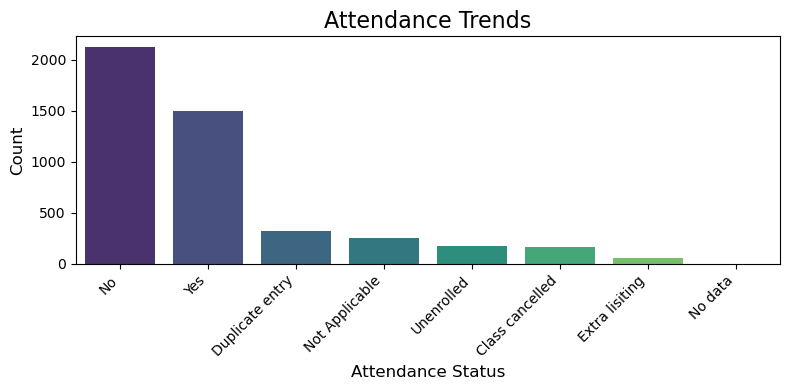

In [148]:
plt.figure(figsize=(8, 4))  # Increased figure size
sns.barplot(x=attendance_trend.index, y=attendance_trend.values, palette="viridis")
plt.title("Attendance Trends", fontsize=16)
plt.xlabel("Attendance Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Ensure the layout adjusts to fit everything
plt.show()


Feedback analysis

In [149]:
feedback_scores = data_subset[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()

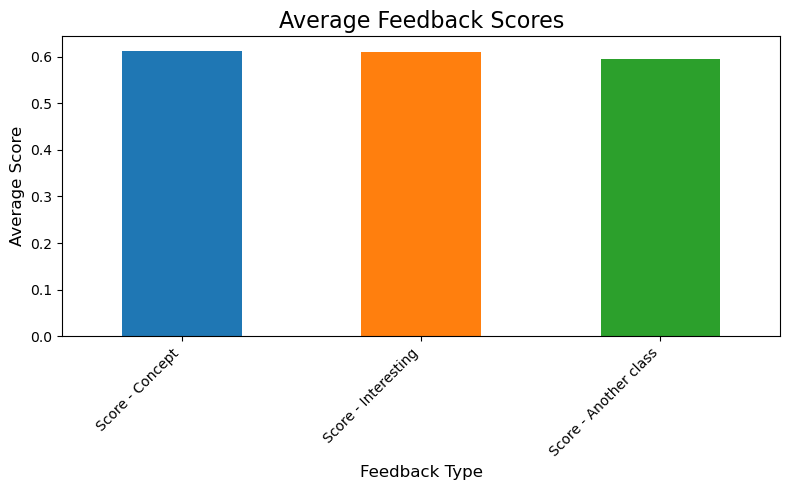

In [150]:
plt.figure(figsize=(8, 5))
feedback_scores.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Average Feedback Scores", fontsize=16)
plt.xlabel("Feedback Type", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right
plt.tight_layout()
plt.show()


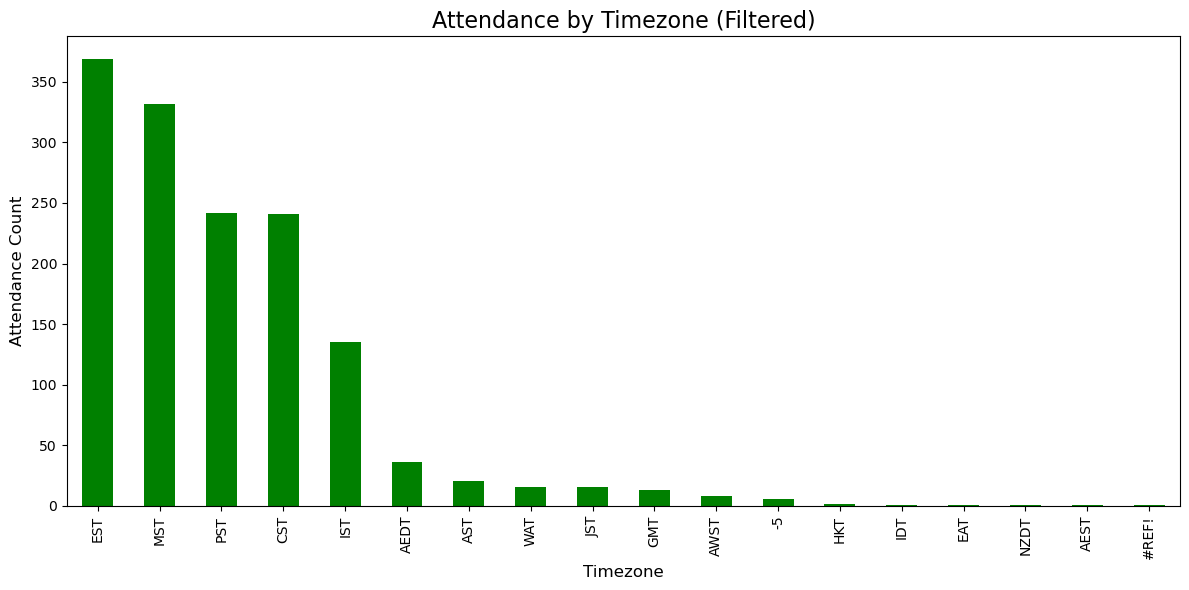

In [151]:
# Group by timezone and count attendance
attendance_by_timezone = data_subset.groupby('Timezone')['Attended?'].apply(lambda x: (x == 'Yes').sum())

# Ensure the data is numeric and filter time zones with attendance greater than zero
attendance_by_timezone = attendance_by_timezone.astype(int)
attendance_by_timezone = attendance_by_timezone[attendance_by_timezone > 0]

# Plot the filtered data
plt.figure(figsize=(12, 6))
attendance_by_timezone.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Attendance by Timezone (Filtered)", fontsize=16)
plt.xlabel("Timezone", fontsize=12)
plt.ylabel("Attendance Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


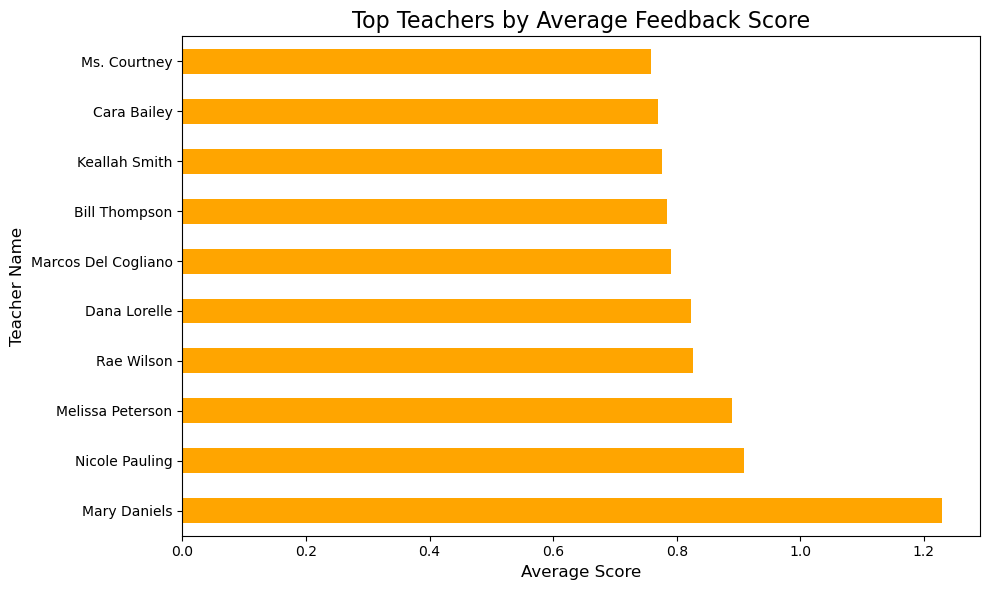

In [152]:
teacher_feedback = data_subset.groupby('Teacher Name')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()
teacher_feedback['Average Score'] = teacher_feedback.mean(axis=1)
top_teachers = teacher_feedback.sort_values(by='Average Score', ascending=False)

plt.figure(figsize=(10, 6))
top_teachers['Average Score'].head(10).plot(kind='barh', color='#ffa500')
plt.title("Top Teachers by Average Feedback Score", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Teacher Name", fontsize=12)
plt.tight_layout()
plt.show()

In [153]:
topics_feedback = data_subset.groupby('Topics')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()
topics_feedback['Average Score'] = topics_feedback.mean(axis=1)
top_topics = topics_feedback.sort_values(by='Average Score', ascending=False)

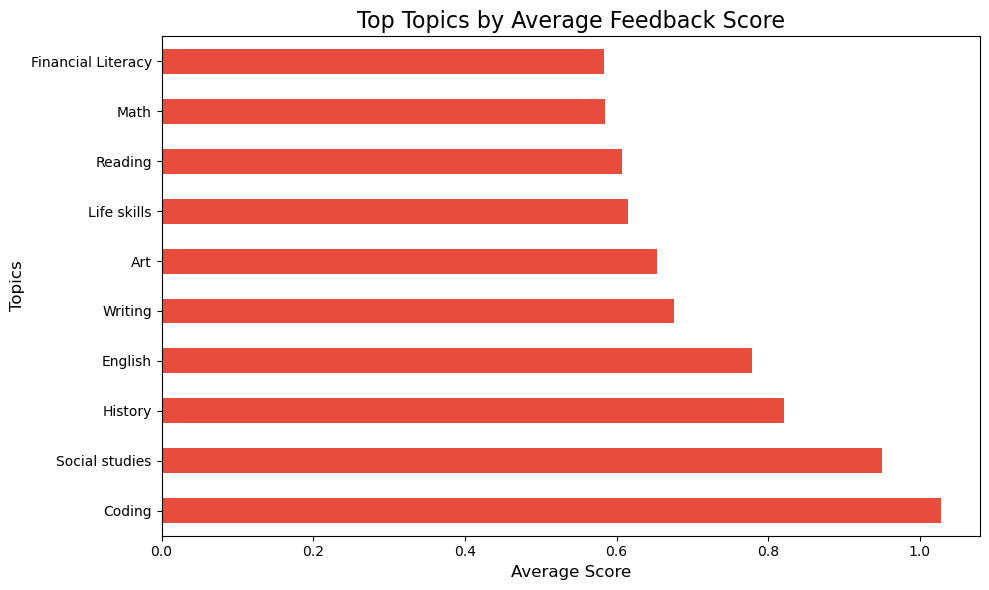

In [154]:
plt.figure(figsize=(10, 6))
top_topics['Average Score'].head(10).plot(kind='barh', color='#e74c3c')
plt.title("Top Topics by Average Feedback Score", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Topics", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_17556\3263665015.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  attendance_by_hour = pd.to_datetime(data_subset['Start time (in PST)']).dt.hour.value_counts().sort_index()


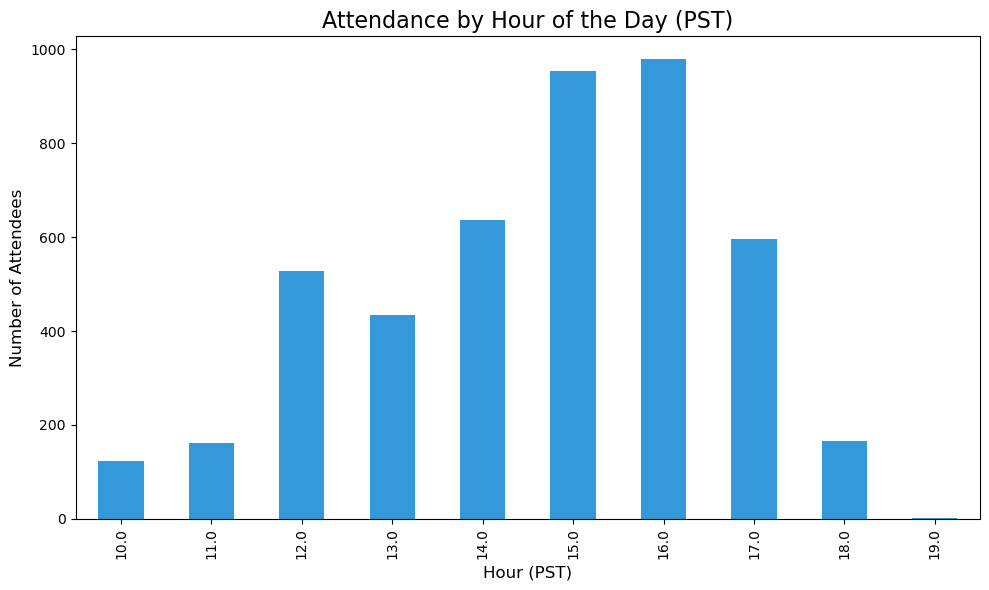

In [155]:
attendance_by_hour = pd.to_datetime(data_subset['Start time (in PST)']).dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 6))
attendance_by_hour.plot(kind='bar', color='#3498db')
plt.title("Attendance by Hour of the Day (PST)", fontsize=16)
plt.xlabel("Hour (PST)", fontsize=12)
plt.ylabel("Number of Attendees", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_17556\3305619168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Attendance_Binary'] = data_subset['Attended?'].map({'Yes': 1, 'No': 0})


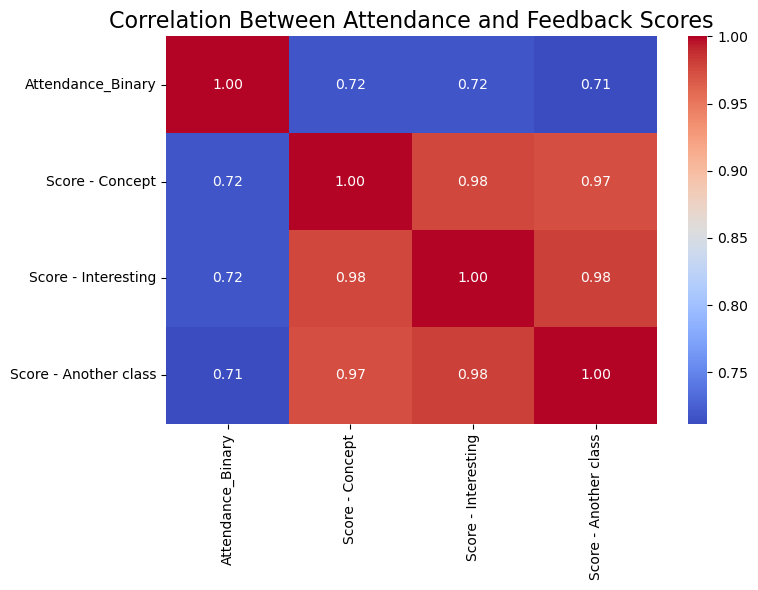

In [156]:
# Convert attendance to binary
data_subset['Attendance_Binary'] = data_subset['Attended?'].map({'Yes': 1, 'No': 0})

# Correlation between attendance and feedback scores
attendance_feedback_corr = data_subset[['Attendance_Binary', 'Score - Concept', 'Score - Interesting', 'Score - Another class']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(attendance_feedback_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Attendance and Feedback Scores", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\chand\AppData\Local\Temp\ipykernel_17556\3821772849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Age Group'] = pd.cut(data_subset['Age'], bins=bins, labels=labels, include_lowest=True)
C:\Users\chand\AppData\Local\Temp\ipykernel_17556\3821772849.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_feedback = data_subset.groupby('Age Group')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()


<Figure size 1000x600 with 0 Axes>

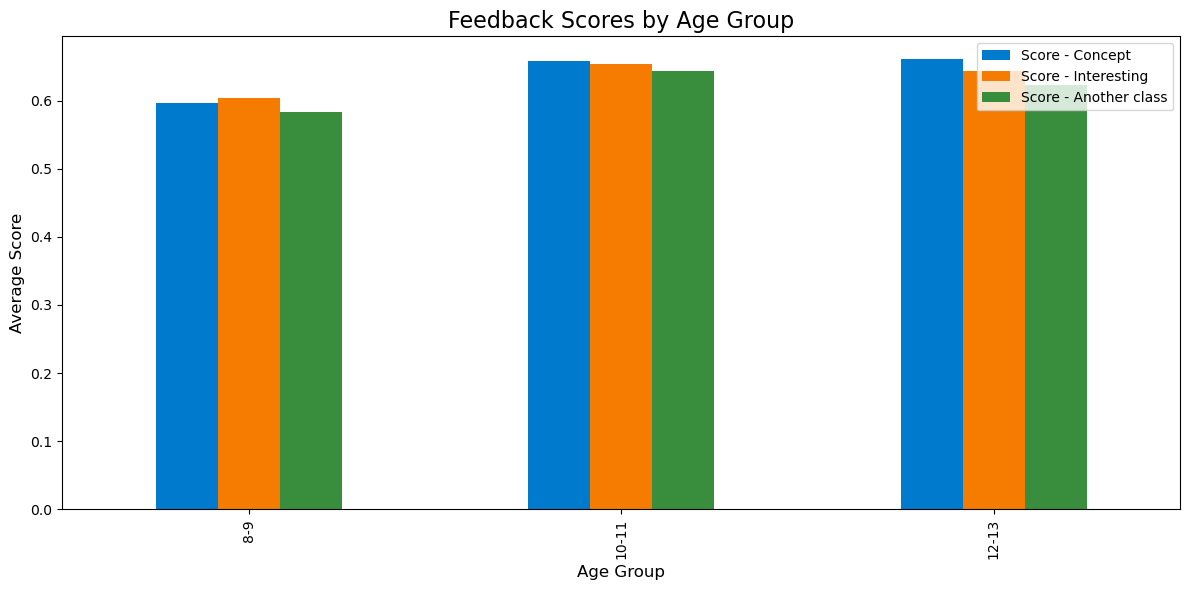

In [157]:
# Categorize ages into bins
bins = [7, 9, 11, 13]
labels = ['8-9', '10-11', '12-13']
data_subset['Age Group'] = pd.cut(data_subset['Age'], bins=bins, labels=labels, include_lowest=True)

age_feedback = data_subset.groupby('Age Group')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()

plt.figure(figsize=(10, 6))
age_feedback.plot(kind='bar', figsize=(12, 6), color=['#007acc', '#f57c00', '#388e3c'])
plt.title("Feedback Scores by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.tight_layout()
plt.show()


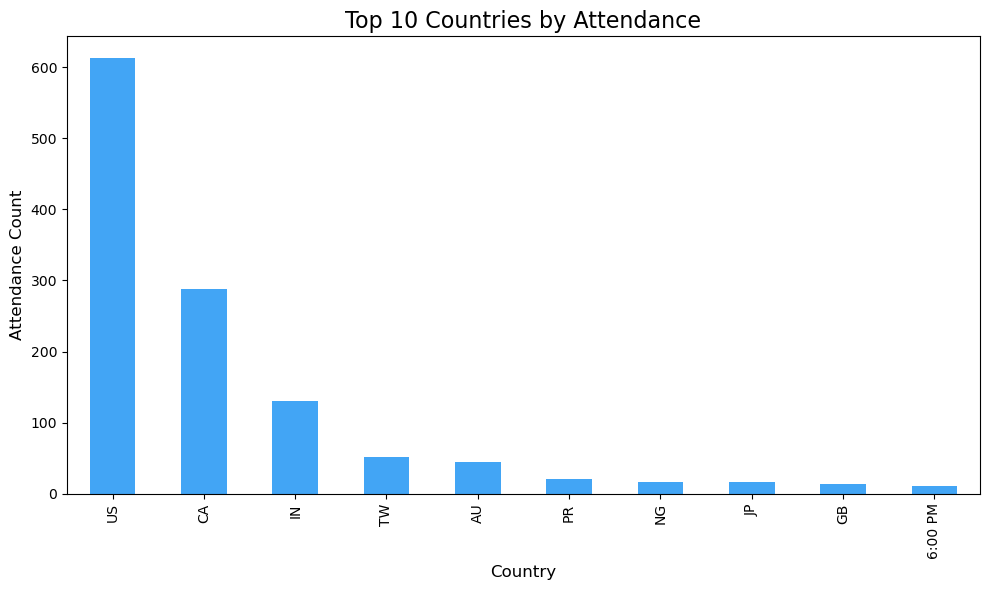

In [158]:
country_attendance = data_subset.groupby('Country')['Attended?'].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_attendance.plot(kind='bar', color='#42a5f5')
plt.title("Top 10 Countries by Attendance", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Attendance Count", fontsize=12)
plt.tight_layout()
plt.show()


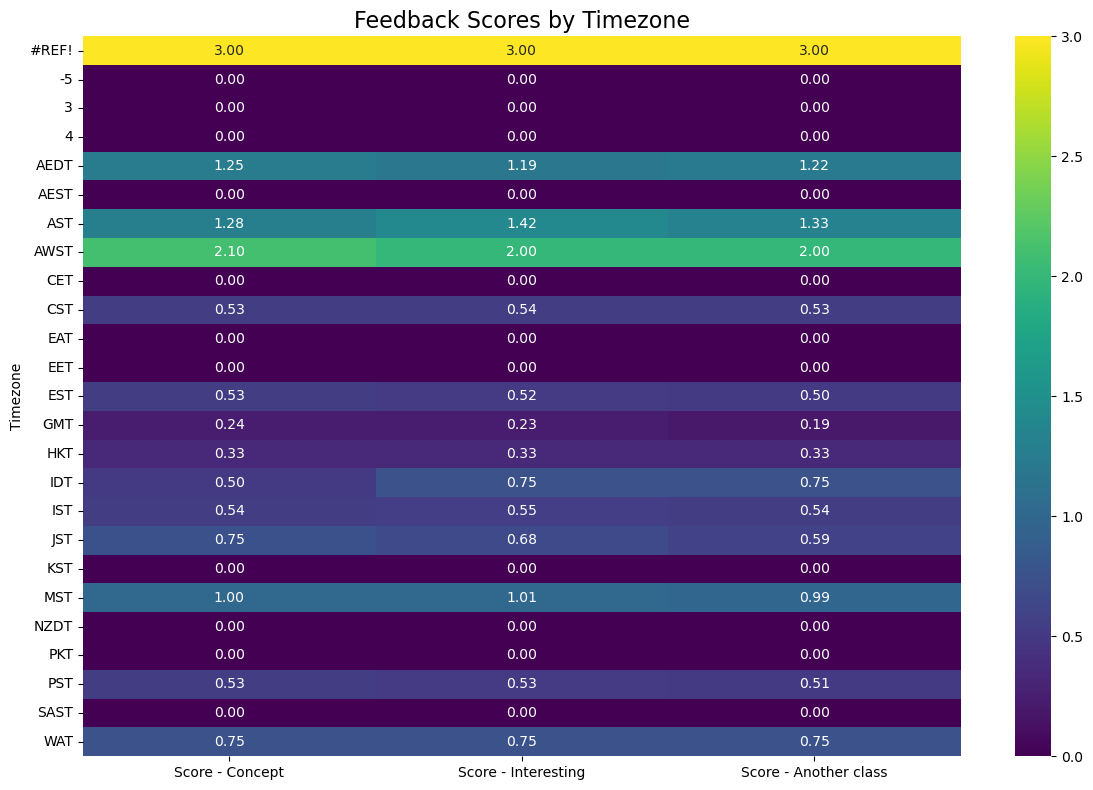

In [159]:
timezone_feedback = data_subset.groupby('Timezone')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(timezone_feedback, annot=True, cmap='viridis', fmt='.2f')
plt.title("Feedback Scores by Timezone", fontsize=16)
plt.tight_layout()
plt.show()


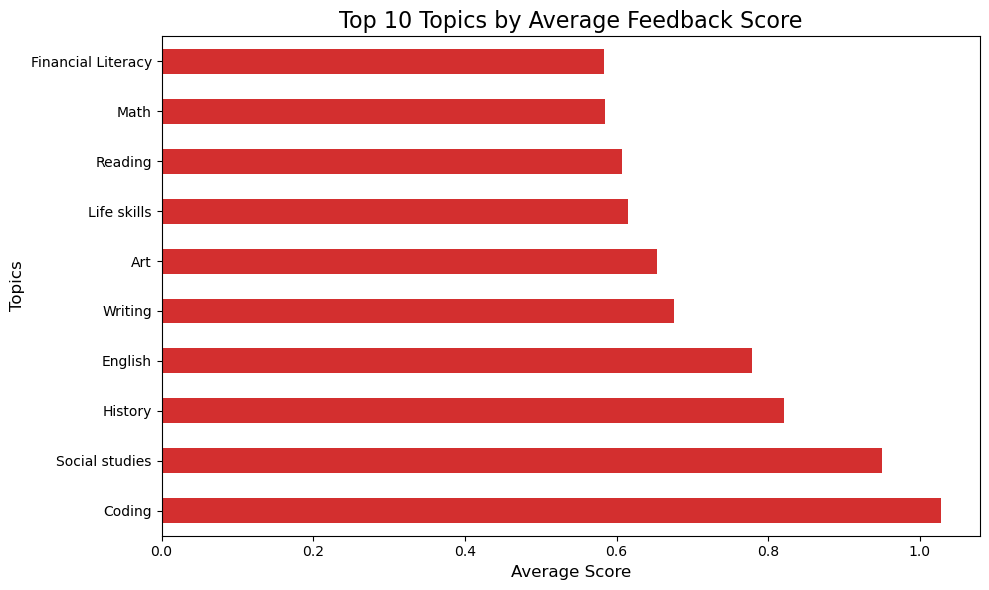

In [160]:
topics_feedback = data_subset.groupby('Topics')[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()
topics_feedback['Average Score'] = topics_feedback.mean(axis=1)
top_topics = topics_feedback.sort_values(by='Average Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_topics['Average Score'].plot(kind='barh', color='#d32f2f')
plt.title("Top 10 Topics by Average Feedback Score", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Topics", fontsize=12)
plt.tight_layout()
plt.show()


In [161]:
teacher_topic_feedback = data_subset.groupby(['Teacher Name', 'Topics'])[['Score - Concept', 'Score - Interesting', 'Score - Another class']].mean()
teacher_topic_feedback['Average Score'] = teacher_topic_feedback.mean(axis=1)
top_teacher_topics = teacher_topic_feedback.sort_values(by='Average Score', ascending=False).head(10)

print(top_teacher_topics)


                                       Score - Concept  Score - Interesting  \
Teacher Name       Topics                                                     
Mary Daniels       Math                       1.187500             1.250000   
Bill Thompson      Life skills                1.200000             1.200000   
Aaron Potsick      Speaking                   1.076923             1.153846   
Erin Coley         Life skills                1.071429             1.017857   
Stefany Pineda     Speaking                   1.125000             1.000000   
Rae Wilson         Coding                     1.000000             1.059524   
Melissa Peterson   Life skills                1.000000             1.050000   
Mariposa Enamorada Financial Literacy         1.000000             1.090909   
Ms. Courtney       Social studies             0.969697             0.939394   
Nicole Pauling     History                    0.935135             0.972973   

                                       Score - Anot